# Hola Ilse! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Ilse, tu notebook está casi terminado. Tan solo debes agregar algunas celdas más donde entrenes el modelo knn con la data no escalada para compararlo con la escalada y en el modelo de regresión lineal uses la data escalada para compararlo con el resultado ya obtenido de la data no escalada. Además complementa un poco la demostración para que quede claro el resultado.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien Ilse, lo último que falta es corregir la parte de la demostración. Te dejé un detalle específico con el que podrás finalizarla correctamente.
    
Saludos!    

</div>

## Resumen de la revisión 3 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Buen trabajo Ilse, tu notebook ha sido completado. No tengo correcciones adicionales.
    
Saludos!    

</div>

-----

# Sprint 11 - Ilse Salinas
# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
#pip install scikit-learn --upgrade

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


from IPython.display import display

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

gender   age   income  family_members  insurance_benefits
849        0  33.0  43800.0               0                   0
4703       0  41.0  46300.0               0                   0
1842       0  44.0  28000.0               0                   1
4627       0  35.0  24800.0               0                   0
1990       1  19.0  41600.0               1                   0
1175       0  42.0  39200.0               0                   1
4652       1  22.0  45000.0               2                   0
3192       0  30.0  48800.0               2                   0
2808       0  20.0  38200.0               1                   0
2246       1  21.0  32900.0               1                   0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial
# escribe tu conversión aquí si lo deseas:
df['age'] = df['age'].astype(int)

In [8]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?
estadisticas = df.describe()
print(estadisticas)

            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000  


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien con la intro de los datos

</div>

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

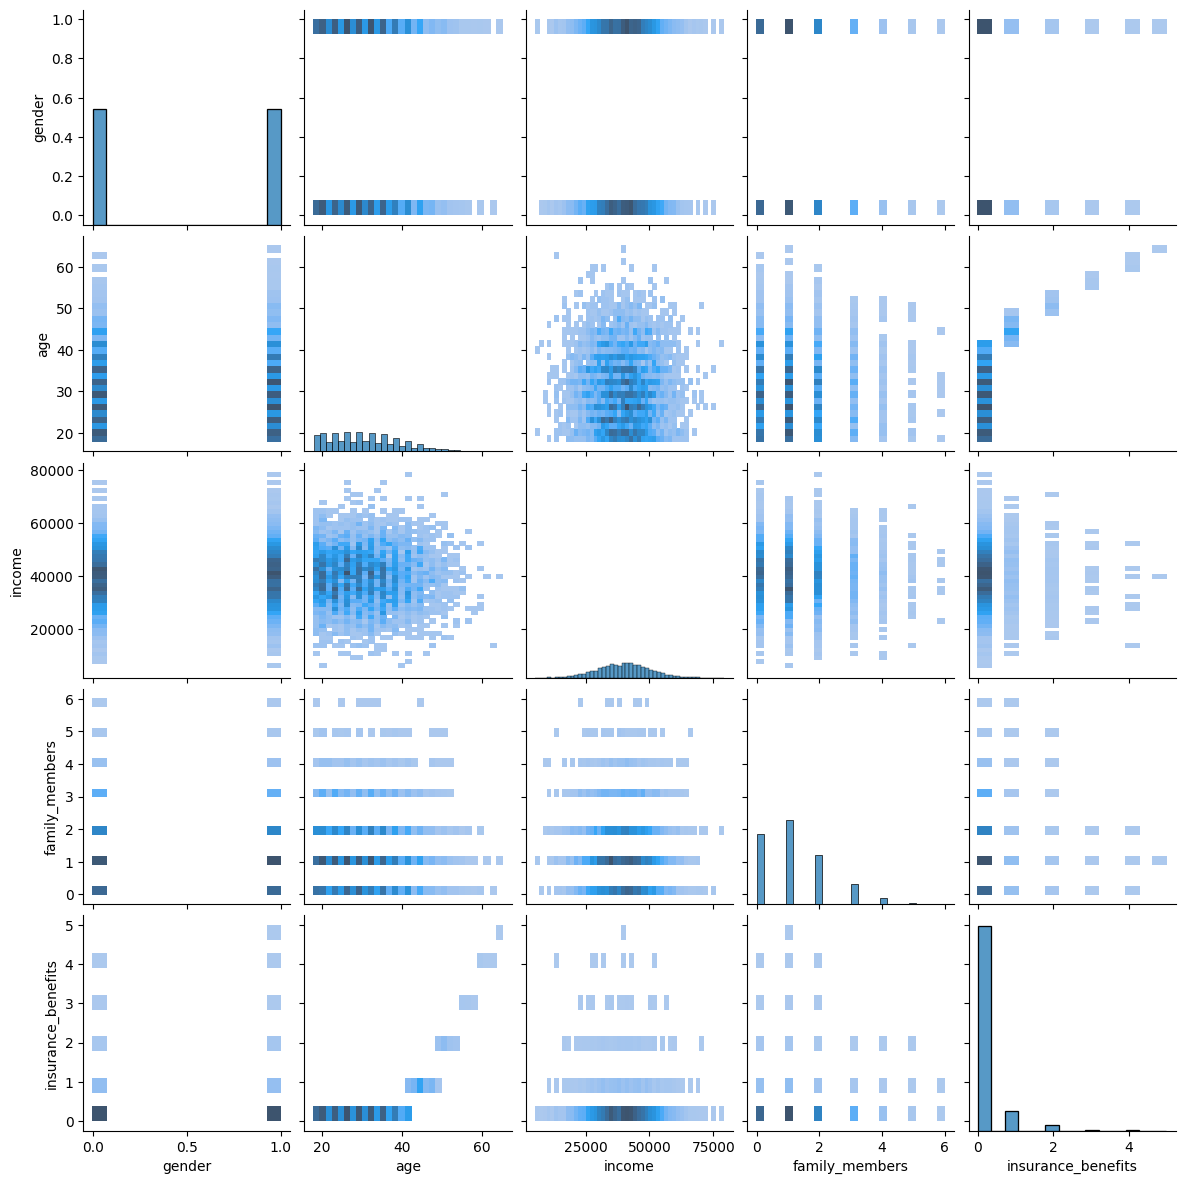

In [10]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [11]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [12]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [14]:
df_scaled.sample(5)

gender       age    income  family_members  insurance_benefits
2154     1.0  0.369231  0.610127        0.333333                   0
1227     1.0  0.800000  0.531646        0.000000                   2
536      1.0  0.384615  0.515190        0.166667                   0
2865     1.0  0.446154  0.600000        0.166667                   0
1485     1.0  0.630769  0.413924        0.000000                   0

Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [15]:
# En este caso quiero encontrar clientes que sea similares a un cliente determinado
# Como prueba se escoge a un cliente cuyo sueldo sea la mediana para valor de n y verificar clientes cercanos a este resultado

# Calcular la mediana del ingreso en el DataFrame escalado
median_income = df_scaled['income'].median()

# Encontrar el índice de la fila con el ingreso más cercano a la mediana en el DataFrame escalado
median_row_index = (df_scaled['income'] - median_income).abs().idxmin()

# n es el cliente con el que queremos encontrar similitudes
n=median_row_index
metrics = ['euclidean', 'manhattan'] # uso de ambas metricas
k_values = [3, 5, 7] # comparacion con 3, 5 y 7 vecinos

# Iterar sobre cada combinación de métricas y k
results = {}

for metric in metrics:
    for k in k_values:
        result = get_knn(df_scaled, n, k, metric)
        key = f"metric={metric}_k={k}"
        results[key] = result

for key, value in results.items():
    print(f"\nResultados para {key}:\n", value)


Resultados para metric=euclidean_k=3:
       gender       age    income  family_members  insurance_benefits  distance
40       1.0  0.646154  0.508861             0.0                   1  0.000000
1551     1.0  0.646154  0.512658             0.0                   1  0.003797
4977     1.0  0.630769  0.502532             0.0                   0  0.016636

Resultados para metric=euclidean_k=5:
       gender       age    income  family_members  insurance_benefits  distance
40       1.0  0.646154  0.508861             0.0                   1  0.000000
1551     1.0  0.646154  0.512658             0.0                   1  0.003797
4977     1.0  0.630769  0.502532             0.0                   0  0.016636
1874     1.0  0.630769  0.517722             0.0                   0  0.017754
3335     1.0  0.646154  0.534177             0.0                   1  0.025316

Resultados para metric=euclidean_k=7:
       gender       age    income  family_members  insurance_benefits  distance
40       1.

/home/jovyan/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/base.py:4

Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Si afecta el hecho de que los datos no esten escalados al algoritmo kNN porque éste se basa en la distancia entre puntos para realizar predicciones. Por esta razón, si los valores no están escalados puede darse eel caso en el que las características con rangos más grandes dominen la medida de la distancia e influir en los resultados finales de forma desproporcionada.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

En cuanto a la similitudes que comparte la métrica de distancia Manhattan con la métrica Euclidiana en el algoritmo kNN, ésta es igualmente sensible a la escala de caracterísitcas pero en cuanto a las predicciones dependiendo de la aplicación maneja mejor los valores atipicos y en caso de espacios de alta dimensión aumenta de forma lineal mientras que la Euclidiana tiende a aumentar rápidamente. Para el caso de los datos manejados en este proyecto no hay diferencia en los resultados ya que es una cantidad mínima. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correctas las respuestas. Efectivamente las escalas de las dimensiones afectan al algoritmo knn pues hacen que tengan más prioridad las de escalas más grandes. Por otro lado, en este caso las métricas Manhattan y Euclidiana son similares, pero a medida que que aumentan las dimenesiones se diferencian más.

</div>

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [16]:
# сalcula el objetivo
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [17]:
# comprueba el desequilibrio de clases con value_counts()
class_counts = df['insurance_benefits_received'].value_counts()
print("Clase 0 (sin beneficios) y Clase 1 (con beneficios):")
print(class_counts)

Clase 0 (sin beneficios) y Clase 1 (con beneficios):
0    4436
1     564
Name: insurance_benefits_received, dtype: int64


In [18]:
#pip install imbalanced-learn --user

In [19]:
# corregir el desequilibrio de clases
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
# Usar el Oversampling (sobremuestreo) con SMOTE (Synthetic Minority Over-sampling Technique) para sobremuestrear la clase minoritaria
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1), df['insurance_benefits_received'])

# Dividir los datos en entrenamiento y prueba respetando la proporción 70:30
# Dividir los datos en entrenamiento y prueba respetando la proporción 70:30
features_train, features_test, target_train, target_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [20]:
def eval_classifier(y_true, y_pred):
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [21]:
# generar la salida de un modelo aleatorio
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [22]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df), seed=42)
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, este modelo tiene un tope con el parámetro de probabilidad

</div>

In [23]:
# Evaluacion de modelos kNN
from sklearn.neighbors import KNeighborsClassifier

# Probar diferentes valores de k para kNN y evaluar con/sin escalado
# Evaluación con datos escalados
k_values = range(1, 11)
for scale in [False, True]:  # Probar con datos originales y escalados
    scaler = sklearn.preprocessing.StandardScaler() if scale else None
    features_train_scaled = scaler.fit_transform(features_train) if scaler else features_train
    features_test_scaled = scaler.transform(features_test) if scaler else features_test
    
    for k in k_values:
        print(f'\nEvaluando kNN con k={k}, Escalado={scale}')
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(features_train_scaled, target_train)
        y_pred_knn = knn.predict(features_test_scaled)
        f1 = f1_score(target_test, y_pred_knn)
        print(f'F1 Score: {f1:.2f}')


Evaluando kNN con k=1, Escalado=False
F1 Score: 0.95

Evaluando kNN con k=2, Escalado=False
F1 Score: 0.92

Evaluando kNN con k=3, Escalado=False
F1 Score: 0.92

Evaluando kNN con k=4, Escalado=False
F1 Score: 0.89

Evaluando kNN con k=5, Escalado=False
F1 Score: 0.89

Evaluando kNN con k=6, Escalado=False
F1 Score: 0.86

Evaluando kNN con k=7, Escalado=False
F1 Score: 0.85

Evaluando kNN con k=8, Escalado=False
F1 Score: 0.82

Evaluando kNN con k=9, Escalado=False
F1 Score: 0.82

Evaluando kNN con k=10, Escalado=False
F1 Score: 0.80

Evaluando kNN con k=1, Escalado=True
F1 Score: 0.99

Evaluando kNN con k=2, Escalado=True
F1 Score: 0.99

Evaluando kNN con k=3, Escalado=True
F1 Score: 0.99

Evaluando kNN con k=4, Escalado=True
F1 Score: 0.99

Evaluando kNN con k=5, Escalado=True
F1 Score: 0.99

Evaluando kNN con k=6, Escalado=True
F1 Score: 0.99

Evaluando kNN con k=7, Escalado=True
F1 Score: 0.99

Evaluando kNN con k=8, Escalado=True
F1 Score: 0.99

Evaluando kNN con k=9, Escalado=Tr

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien con el modelo de data escalada.

</div>

In [24]:
# Evaluación de kNN con datos no escalados
print("\nEvaluación de kNN con datos no escalados:")
for k in k_values:
    print(f'\nEvaluando kNN con k={k}, Escalado=False')
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, target_train)
    y_pred_knn = knn.predict(features_test)
    f1 = f1_score(target_test, y_pred_knn)
    print(f'F1 Score: {f1:.2f}')


Evaluación de kNN con datos no escalados:

Evaluando kNN con k=1, Escalado=False
F1 Score: 0.95

Evaluando kNN con k=2, Escalado=False
F1 Score: 0.92

Evaluando kNN con k=3, Escalado=False
F1 Score: 0.92

Evaluando kNN con k=4, Escalado=False
F1 Score: 0.89

Evaluando kNN con k=5, Escalado=False
F1 Score: 0.89

Evaluando kNN con k=6, Escalado=False
F1 Score: 0.86

Evaluando kNN con k=7, Escalado=False
F1 Score: 0.85

Evaluando kNN con k=8, Escalado=False
F1 Score: 0.82

Evaluando kNN con k=9, Escalado=False
F1 Score: 0.82

Evaluando kNN con k=10, Escalado=False
F1 Score: 0.80


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Realiza lo mismo pero con el modelo de data no escalada para que lo compares con el anterior.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien, nota que la data no escalada tiene resultados más inestables.

</div>

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [25]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2.dot(self.weights)
        
        return y_pred

In [26]:
import math
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [27]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

print("\nEvaluación de Regresión Lineal con datos no escalados:")
lr = MyLinearRegression()

lr.fit(X_train, y_train)
print("Pesos:",lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)


Evaluación de Regresión Lineal con datos no escalados:
Pesos: [-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto
    
</div>

In [28]:
# Evaluación con datos escalados
from sklearn.preprocessing import StandardScaler

print("\nEvaluación de Regresión Lineal con datos escalados:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)
print("Pesos:", lr.weights)
y_test_pred_scaled = lr.predict(X_test_scaled)
eval_regressor(y_test, y_test_pred_scaled)


Evaluación de Regresión Lineal con datos escalados:
Pesos: [ 0.14971429  0.30292778  0.0082117  -0.00258294 -0.01271039]
RMSE: 0.34
R2: 0.66


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Realiza lo mismo pero con la data escalada, compara ambos resultados
    
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, observa que los coeficientes del modelo son diferentes pero la calidad es la misma.

</div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [29]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [30]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [31]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [32]:
# Verificar que la matriz P es invertible - solo si su determinante no es cero
det_P = np.linalg.det(P)
if det_P == 0:
    print("La matriz P no es invertible.")
else:
    print("La matriz P es invertible.")
    print("Determinante de P:", det_P)

La matriz P es invertible.
Determinante de P: 0.24339135998015463


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correcto
    
</div>

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [33]:
# Transformar los datos
X_transformed = X.dot(P)
print("Datos transformados:\n", X_transformed)

# Sin conocer P, revertir la transformación es impracticable
# Intentar adivinar la edad o ingresos directamente de X_transformed no es factible

Datos transformados:
 [[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]


¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [34]:
# Dado que P es invertible, hay la posibilidad de recuperar las caracteristicas originales
# Recordatorio: P por P-1 = I, entonces con formula ded arriba haciendo despeje tenemos X = X' por P-1

# Transformar los datos X' = X por P
X_transformed = X.dot(P)
print("Datos transformados:\n", X_transformed)

# Calcular la inversa de P
P_inv = np.linalg.inv(P)

# Recuperar los datos originales X = X' por P-1
X_recovered = X_transformed.dot(P_inv)
print("Datos originales recuperados:\n", X_recovered)

# Verificar si los datos originales recuperados son iguales a los originales
print("Los datos recuperados son iguales a los originales:", np.allclose(X, X_recovered))

Datos transformados:
 [[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]
Datos originales recuperados:
 [[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
 ...
 [-1.92837871e-12  2.00000000e+01  3.39000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.20000000e+01  3.27000000e+04  3.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  4.06000000e+04  1.00000000e+00]]
Los datos recuperados son iguales a los originales: True


Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [35]:
# Dataframes : Datos transformados - Datos invertidos
# Convertir las matrices a DataFrames para mejor visualización
df_transformed = pd.DataFrame(X_transformed, columns=['age', 'gender', 'income', 'family_members'])
df_recovered = pd.DataFrame(X_recovered, columns=['age', 'gender', 'income', 'family_members'])

# Mostrar los datos originales, transformados y recuperados
print("Datos originales:")
print(df)

print("\nDatos transformados:")
print(df_transformed)

print("\nDatos recuperados (invertidos):")
print(df_recovered)

Datos originales:
      gender  age   income  family_members  insurance_benefits  \
0          1   41  49600.0               1                   0   
1          0   46  38000.0               1                   1   
2          0   29  21000.0               0                   0   
3          0   21  41700.0               2                   0   
4          1   28  26100.0               0                   0   
...      ...  ...      ...             ...                 ...   
4995       0   28  35700.0               2                   0   
4996       0   34  52400.0               1                   0   
4997       0   20  33900.0               2                   0   
4998       1   22  32700.0               3                   0   
4999       1   28  40600.0               1                   0   

      insurance_benefits_received  
0                               0  
1                               1  
2                               0  
3                               0  
4        

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

En primer lugar, el hecho de no tener valores exactamente iguales se debe a la precision y errores de redondeo ya que estamos manejando numero flotantes. Esto sucede mucho al realizar los diferentes calculos como la matriz de transformacion o inversa 
especialmente con la matriz P ya que si no esta bien condicionada genera esta clase de errores de precisión. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo! Efectivamente esa pequeña diferencia se debe a la precisión numérica limitada de los ordenadores
    
</div>

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

1. ¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

2. ¿Cuáles serían los valores predichos con $w_P$? 

3. ¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

A continuación se responderán las preguntas de arriba y posteriormente se mostrará matemáticamente la relación entre variables.
   1. En primer lugar hay que entender lo que significa w y wp lo cual en este caso w hace referencia a los pesos originales calculados con los datos originales mientras que wp son los pesos calculados con los datos ofuscados. Ahora, la forma en la que se relacionan ambas si se simplifica la formula descrita arriba para wp seria de la siguiente forma: $wp = P^{-1}w$. Esta relación de variables se encuentra en la siguente sección de prueba analítica. 
   2. Los valores predilectos con $wp$ seria $y$ que son los valores predichos con los valores originales y los pesos de $w$, esto se demuestra a continuacion.
   3. La RECM mide la diferencia entre los valores predichos y los valores reales. Dado que $yp = y$ la RECM sera igual tanto para los datos originales como ofuscados demostrando entonces que la calidad de la regresión lineal no se verá afectada por esto. 

**Prueba analítica**


   1. Teniendo las expresiones para $w$ y $wp$, procedemos a demostrar mediante las propiedades de las matrices en el ápendice B la relación de ambas variables. 
   
       1. Se comienza simplificando la formula de $wp$ de la siguiente manera:
   $w_P = [(XP)^T XP]^{-1} (XP)^T y$
   
       2. Aplicamos la propiedad inversa de un producto de matrices:
   $((XP)^T(XP))^{-1} = (P^T X^T XP)^{-1}$
   
       3. Después usamos la propiedad de $(AB)^T = B^TA^T$:  $(P^T X^T XP)^{-1} = P^{-1}(X^T X)^{-1} (P^T)^{-1}$
   
       4. En la expresión $wp = P^{-1}(X^T X)^{-1} (P^T)^{-1} (XP)^T y$ aplicamos la propiedad de transposición sobre el término $(XP)^T$ quedando como $X^T P^T$, entonces quedaría desglosada de la siguiente manera: $wp = P^{-1}(X^T X)^{-1} (P^T)^{-1} X^T P^T y$
   
       5. En esta última expresión, existen términos que al multiplicarse entre si obtenemos la expresión de $w$ siendo esta $w = (X^T X)^{-1} X^T$ asi que la sustituimos en la expresion quedando asi: $wp = w P^{-1} (P^T)^{-1} P^T y$.
       
       6. En esta expresión se tiene la multiplicación de $(P^T)^{-1} P^T$ que como resultado da la matriz identidad $I$ quedando entonces la expresión como $wp = w P^{-1} (P^T)^{-1} P^T$
   
       7. Finalmente se llega a la relacion $wp = P^{-1}w$
   
   
   2. Recordemos que la representación de los datos ofuscados $X'$ se ve de la siguiente forma: $X' = XP$ y los pesos $wp$ son $yp = X' wp$ donde haciendo la sustitucion de $X'$ y $wp$ queda como $yp = XP(P^{-1}w)$. De acuerdo con la propiedad $PP^{-1} = I$, quedaria finalmente como $yp = Xw = y$ donde $y$ son los valores predichos con los valores originales y los pesos de $w$ como se mencionó anteriormente.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, bien, pero nota que de la 5ta a la 6ta linea no está muy claro el desarrollo, agrega un paso entre medio de esas 2 que continue el desarrollo y explique cómo se llega al resultado.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

La demostración aún es incorrecta, de la parte D donde tienes $wp = P^{-1}(X^T X)^{-1} (P^T)^{-1} (XP)^T y$, basta con usar la propiedad de transposición sobre lo que está en parentesis con el término que está justo antes de $y$, con eso $(XP)^T$ queda como $P^TX^T$ y al reemplazar nota que se eliminan un par de términos. Así encontrarás a $w$ dentro de la expresión

</div> 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Ok, me parece que hay un error de tipeo pero la idea está bien.

</div>

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia? No no hay ninguna diferencia. 

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.
- Utiliza $XP$ como la nueva matriz de características

In [36]:
# Generar datos de ejemplo
np.random.seed(42)  # Fijar semilla para reproducibilidad
X = np.random.rand(100, 5)  # Matriz de características original (100 filas, 5 columnas)
P = np.random.rand(5, 5)    # Matriz de ofuscación inicial (5x5)

# Asegurar que P sea invertible
while np.linalg.det(P) == 0:
    P = np.random.rand(5, 5)

In [37]:
# Suponiendo que X es la matriz de características original
X_prime = np.dot(X, P)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Vector objetivo de ejemplo
y = np.random.rand(100)

# Regresión lineal con datos originales
reg_original = LinearRegression()
reg_original.fit(X, y)

# Predicciones con datos originales
y_pred_original = reg_original.predict(X)

# Evaluar rendimiento con datos originales
print("Con datos originales:")
print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred_original)):.2f}')
print(f'R^2: {r2_score(y, y_pred_original):.2f}')

Con datos originales:
RMSE: 0.28
R^2: 0.07


In [39]:
# Regresión lineal con datos ofuscados
reg_ofuscado = LinearRegression()
reg_ofuscado.fit(X_prime, y)

# Predicciones con datos ofuscados
y_pred_ofuscado = reg_ofuscado.predict(X_prime)

# Evaluar rendimiento con datos ofuscados
print("\nCon datos ofuscados:")
print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred_ofuscado)):.2f}')
print(f'R^2: {r2_score(y, y_pred_ofuscado):.2f}')


Con datos ofuscados:
RMSE: 0.28
R^2: 0.07


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto! Muy bien, nota que los resultados son iguales debido a que la regresión lineal es invariante transformaciones lineales, como multiplicar la data por una matriz.
    
</div>

# Conclusiones

A lo largo de este proye

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [ ]  Se ha realizado la tarea 1
    - [ ]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [ ]  Se probó el procedimiento para las cuatro combinaciones propuestas    - [ ]  Se respondieron las preguntas sobre la escala/distancia- [ ]  Se ha realizado la tarea 2
    - [ ]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    - [ ]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.- [ ]  Se ha realizado la tarea 3
    - [ ]  Se implementó la solución de regresión lineal mediante operaciones matriciales    - [ ]  Se calculó la RECM para la solución implementada- [ ]  Se ha realizado la tarea 4
    - [ ]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [ ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [ ]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    - [ ]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM- [ ]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>